<a href="https://colab.research.google.com/github/HazSyl1/FashionMnist_CNN_Classification/blob/main/neuralnetwork_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
(xtrain,ytrain),(xtest,ytest)=datasets.fashion_mnist.load_data()

In [ ]:
print(xtrain)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
print(len(ytrain))

60000


In [ ]:
print(ytrain[:5])

[9 0 0 3 0]


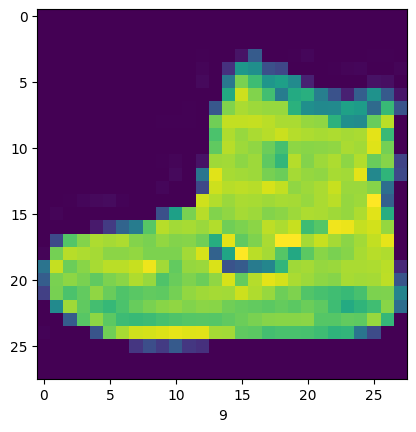

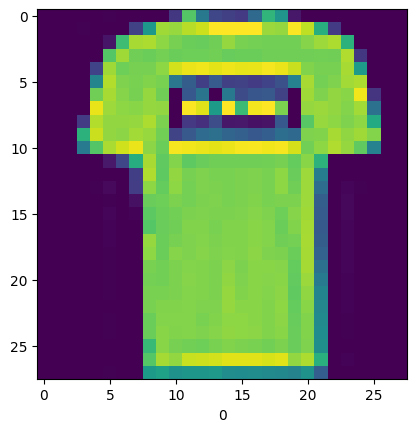

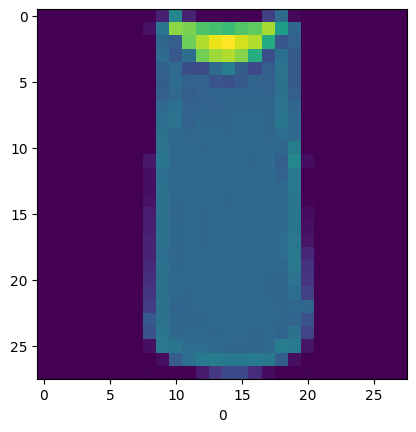

In [ ]:
for i in range(3):
  plt.imshow(xtrain[i])
  plt.xlabel(ytrain[i])
  plt.show()

In [ ]:
print(xtrain.shape)

(60000, 28, 28)


In [ ]:
print(ytrain.shape)

(60000,)


In [ ]:
print(xtest.shape)

(10000, 28, 28)


In [ ]:
print(xtrain.shape[0])

60000


In [ ]:
xtest[0].shape

(28, 28)

In [ ]:
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest=xtest.reshape((xtest.shape[0], 28, 28, 1))

In [ ]:
xtrain.shape

(60000, 28, 28, 1)

In [ ]:
xtrain.shape[0]

60000

In [ ]:
xtrain=xtrain/255.0
xtest=xtest/255.0

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=40)


In [ ]:
#building neural network
from keras.layers import Dropout
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(32, (3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dense(10, activation="softmax"))
print(model.summary())
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xval, yval))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)              

In [ ]:
model.save("Mnist_acc_0.91.h5")

In [ ]:

#model=tf.keras.models.load_model("/content/Mnist_acc_0.91 (1).h5")

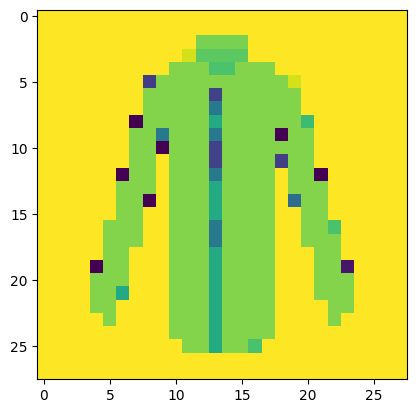

In [ ]:
from keras.preprocessing.image import load_img
img = load_img('/content/shirt_drawing_tutorial.png',grayscale=True,target_size=(28,28))
plt.imshow(img)

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
labels=["shirt","trousers","pullover,""dress","coat","scandal","skirt","sneaker","bag","ankle boot "]
img_ar=img_to_array(img)
img_batch = np.expand_dims(img_ar, axis=0)
img_batch=img_batch/255.0
pred=model.predict(img_batch)
max=np.argmax(pred,axis=1)
print(f"Predicted is {labels[max[0]]}")


1/1 [==============================] - 0s 23ms/step
Predicted is sneaker
